**Principal Component Analysis** is a dimensionality reduction technique used to reduce the size of a large dataset by transforming the large dataset into a smaller one while still retaining most of the information from the large dataset.

**PCA Features:**
*   Unsupervised
*   Works with numeric data only
*   Finds patterns in the columns
*   It looks for new columns that are linear combinations of existing columns and captures the bulk of the variation in data
 </br>


**Why PCA?**
*  To solve the curse of dimensionality, which states the amount of data you  need to train a model increases exponentially with the number of input features.
*  Reduce the risk of overfitting a model to noisy features
*  Make simpler data visualizations

**When PCA?**

* When the individual features are correlated with each other.
* When the features are uncorrelated with each other, PCA will not be useful.

**Disadvantages of PCA:**

* Model explainability/interpretability cannot be done. For eg. if we use SHAP to explain the model, it will output the impact the principal components have on the model, but not directly the impact of the individual features, which in most cases are what we are interested in.








**Summarizing data with PCA**

 This dataset contains customer data pertaining to demographic and payment information as well as basic demographics. The final column default payment next month is what we want to create profiles for.

In [ ]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
default = pd.read_csv('/content/sample_data/credit.csv', index_col=0)

In [ ]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [ ]:
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
default.shape

(30000, 24)

In [ ]:
default=default.reset_index()
default.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [ ]:
# Extract features (excluding the ID and target column)
X = default.drop(['ID', 'default.payment.next.month'], axis=1)

In [ ]:
# target column
y = default['default.payment.next.month']

In [ ]:
# Scaling the features to ensure that all features have a mean 0 and std devn 1
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Compute PCA with 2 dimensions
pca_2d = PCA(n_components=2)
df_pca_2d = pd.DataFrame(data=pca_2d.fit_transform(X_std), columns = ['pca_1', 'pca_2'])
df_pca_2d.head()

,pca_1,pca_2
0,-1.887962,-0.906109
1,-0.764696,-2.109288
2,-0.847408,-1.072179
3,-0.196589,-0.809022
4,-0.840934,-0.072538


In [ ]:
#Explained varianace
pca_2d.explained_variance_ratio_

array([0.28448215, 0.17818817])

Together the first two principal components contain 46.2% of the information from the data. The first principal component explains 28.4% of the variance and the second principal explains 17.8% of the variance

In [ ]:
# Compute PCA with 2 dimensions
pca_2d = PCA(n_components=2)
df_pca_2d = pd.DataFrame(data=pca_2d.fit_transform(X_std), columns = ['pca_1', 'pca_2'])
df_pca_2d.head()

,pca_1,pca_2
0,-1.887962,-0.906109
1,-0.764696,-2.109288
2,-0.847408,-1.072179
3,-0.196589,-0.809022
4,-0.840934,-0.072538


In [ ]:
final_df = pd.concat([df_pca_2d, default['default.payment.next.month']], axis = 1)
final_df['default.payment.next.month']= final_df['default.payment.next.month'].astype(str)
fig=px.scatter(final_df, x='pca_1', y='pca_2', color='default.payment.next.month',
               color_discrete_sequence=px.colors.qualitative.D3,
               title = 'PCA 2D Scatter plot')
fig.show()

From the 2D scatter plot of the principal components, we can see that there are no clear clusters within the scatter plot. Hence, reudcing the dimensionality to 2 does not help us find the clusters.

In [ ]:
# Compute PCA with 3 dimensions and visualizing
pca_3d = PCA(n_components=3)
df_pca_3d = pd.DataFrame(data=pca_3d.fit_transform(X_std), columns = ['pca_1', 'pca_2', 'pca_3'])

final_df_3 = pd.concat([df_pca_3d, default['default.payment.next.month']], axis = 1)
final_df_3['default.payment.next.month']= final_df_3['default.payment.next.month'].astype(str)
fig=px.scatter_3d(final_df_3, x='pca_1', y='pca_2', z= 'pca_3', color='default.payment.next.month',
               color_discrete_sequence=px.colors.qualitative.D3,
               title = 'PCA 3D Scatter plot')
fig.show()

Using 3 principal components, captures only 53% of the variace in data. This is still not sufficient to explain the data. SO we need to build a scree plot to determine how many principal components are required to explain >90% of variance.

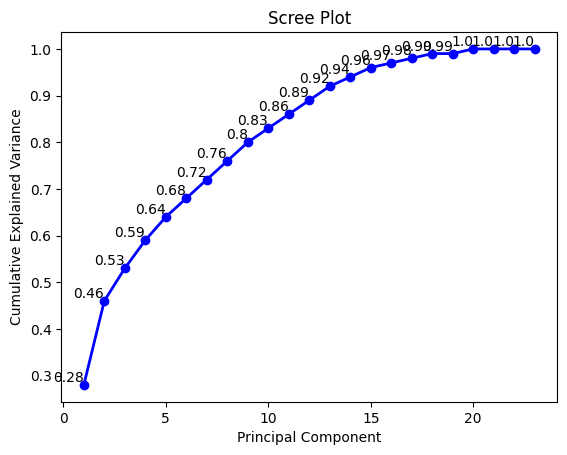

In [ ]:
# Using scree plot to determine the optimum number of principal components required
pca_23 = PCA(n_components=23)
df_pca_23 = pca_23.fit_transform(X_std)

PC_values = range(1,len(pca_23.explained_variance_)+1)
y = np.round(np.cumsum(pca_23.explained_variance_ratio_), 2)
plt.plot(PC_values, y , 'bo-', linewidth=2)
for a,b in zip(PC_values, y):
  plt.text(a, b, str(b), ha='right', va='bottom')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

From the scree plot, 13 principal components are required to explain >90% of variance.